In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

pd.set_option('display.max_colwidth', None)

## Retrieve NLBSE'22 test set - detailed version

In [2]:
test = pd.read_csv('/Users/isdeniz/Documents/msc-notebooks/nlbse22/nlbse22_dataset_preprocessing/test_clean_concat_200_detailed_data.csv')

In [3]:
test.shape

(80518, 7)

In [4]:
test.head()

,original_issue_title,preprocessed_title,original_issue_body,preprocessed_body,text,issue_label,labels
0,"ERROR: KeyError: key (TIFF.SAMPLEFORMAT_INT, 0x0008) not found",error keyerror key tiff.sampleformat_int 0x0008 not found,"One more error might need to be caught.\r\n`4D-series.ome.tif` is sample file from [OME-TIFF website]( https://docs.openmicroscopy.org/ome-model/6.0.0/ome-tiff/data.html).\r\n\r\n```julia\r\njulia> TIFF.load(""4D-series.ome.tif"")\r\nERROR: KeyError: key (TIFF.SAMPLEFORMAT_INT, 0x0008) not found\r\nStacktrace:\r\n [1] getindex(::Dict{Tuple{TIFF.SampleFormats,Int64},DataType}, ::Tuple{TIFF.SampleFormats,UInt16}) at ./dict.jl:477\r\n [2] output(::TIFF.IFD{UInt32}) at /home/hf/.julia/dev/TIFF/src/ifds.jl:113\r\n [3] load(::String) at /home/hf/.julia/dev/TIFF/src/load.jl:14\r\n [4] top-level scope at REPL[2]:1\r\n```\r\n",one more error might need to be caught. 4d series.ome.tif is sample file from ome tiff website https docs.openmicroscopy.org ome model 6.0.0 ome tiff data.html . julia julia tiff.load 4d series.ome.tif error keyerror key tiff.sampleformat_int 0x0008 not found stacktrace 1 getindex dict tuple tiff.sampleformats int64 datatype tuple tiff.sampleformats uint16 at . dict.jl 477 2 output tiff.ifd uint32 at home hf .julia dev tiff src ifds.jl 113 3 load string at home hf .julia dev tiff src load.jl 14 4 top level scope at repl 2 1,time 2020-04-07T09:08:50Z author NONE repo tlnagy/TIFF.jl title error keyerror key tiff.sampleformat_int 0x0008 not found body one more error might need to be caught. 4d series.ome.tif is sample file from ome tiff website https docs.openmicroscopy.org ome model 6.0.0 ome tiff data.html . julia julia tiff.load 4d series.ome.tif error keyerror key tiff.sampleformat_int 0x0008 not found stacktrace 1 getindex dict tuple tiff.sampleformats int64 datatype tuple tiff.sampleformats uint16 at . dict.jl 477 2 output tiff.ifd uint32 at home hf .julia dev tiff src ifds.jl 113 3 load string at home hf .julia dev tiff src load.jl 14 4 top level scope at repl 2 1,enhancement,1
1,Add database backup to dropbox,add database backup to dropbox,NaN,NaN,time 2020-11-27T07:17:21Z author OWNER repo tisboyo/Twitch_Bot title add database backup to dropbox body nan,enhancement,1
2,Add a button/method to open the Source or Output folders,add a button method to open the source or output folders,"Could also add a method to open up path to each file in the File list, by right-clicking.\r\nAlso an option to open up the path to the imgdanke.exe.",could also add a method to open up path to each file in the file list by right clicking. also an option to open up the path to the imgdanke.exe.,time 2021-01-02T19:35:34Z author OWNER repo DrWhoCares/imgdanke title add a button method to open the source or output folders body could also add a method to open up path to each file in the file list by right clicking. also an option to open up the path to the imgdanke.exe.,enhancement,1
3,Processes are being started twice,processes are being started twice,At some point I refactored a few things and ended up leaving in an additional call to `process.Start()` that should've just been replaced by the `using Process process = Process.Start()` call.,at some point i refactored a few things and ended up leaving in an additional call to function that should've just been replaced by the using process process function call.,time 2021-01-02T20:55:34Z author OWNER repo DrWhoCares/imgdanke title processes are being started twice body at some point i refactored a few things and ended up leaving in an additional call to function that should've just been replaced by the using process process function call.,bug,0
4,Cannot add hp to wall,cannot add hp to wall,NaN,NaN,time 2020-12-29T15:34:35Z author OWNER repo Bean-1/AOT title cannot add hp to wall body nan,bug,0


## Retrieve predictions of the RoBERTa model for the NLBSE'22 test set

In [5]:
roberta_preds = pd.read_pickle('/Users/isdeniz/Documents/msc-notebooks/nlbse22/RoBERTa/nlbse22_test_roberta_preds.pkl')
print(roberta_preds.shape)

(80518, 4)


In [6]:
roberta_preds.head()

,text,labels,actual_labels,prediction
0,time 2020-04-07T09:08:50Z author NONE repo tlnagy/TIFF.jl title error keyerror key tiff.sampleformat_int 0x0008 not found body one more error might need to be caught. 4d series.ome.tif is sample file from ome tiff website https docs.openmicroscopy.org ome model 6.0.0 ome tiff data.html . julia julia tiff.load 4d series.ome.tif error keyerror key tiff.sampleformat_int 0x0008 not found stacktrace 1 getindex dict tuple tiff.sampleformats int64 datatype tuple tiff.sampleformats uint16 at . dict.jl 477 2 output tiff.ifd uint32 at home hf .julia dev tiff src ifds.jl 113 3 load string at home hf .julia dev tiff src load.jl 14 4 top level scope at repl 2 1,1,1,0
1,time 2020-11-27T07:17:21Z author OWNER repo tisboyo/Twitch_Bot title add database backup to dropbox body nan,1,1,1
2,time 2021-01-02T19:35:34Z author OWNER repo DrWhoCares/imgdanke title add a button method to open the source or output folders body could also add a method to open up path to each file in the file list by right clicking. also an option to open up the path to the imgdanke.exe.,1,1,1
3,time 2021-01-02T20:55:34Z author OWNER repo DrWhoCares/imgdanke title processes are being started twice body at some point i refactored a few things and ended up leaving in an additional call to function that should've just been replaced by the using process process function call.,0,0,0
4,time 2020-12-29T15:34:35Z author OWNER repo Bean-1/AOT title cannot add hp to wall body nan,0,0,0


In [7]:
mapping = {0: 'bug', 1: 'enhancement', 2: 'question'}

In [8]:
roberta_preds['prediction'] = roberta_preds['prediction'].map(mapping)

In [9]:
roberta_preds['actual_labels'] = roberta_preds['actual_labels'].map(mapping)

In [10]:
actual_labels = roberta_preds['actual_labels']
predicted_labels = roberta_preds['prediction']

confusion_matrix = confusion_matrix(actual_labels, predicted_labels)

class_report = classification_report(actual_labels, predicted_labels, target_names=['bug', 'enhancement', 'question'], digits=3)

conf_matrix_df = pd.DataFrame(confusion_matrix, index=['bug', 'enhancement', 'question'], columns=['bug', 'enhancement', 'question'])

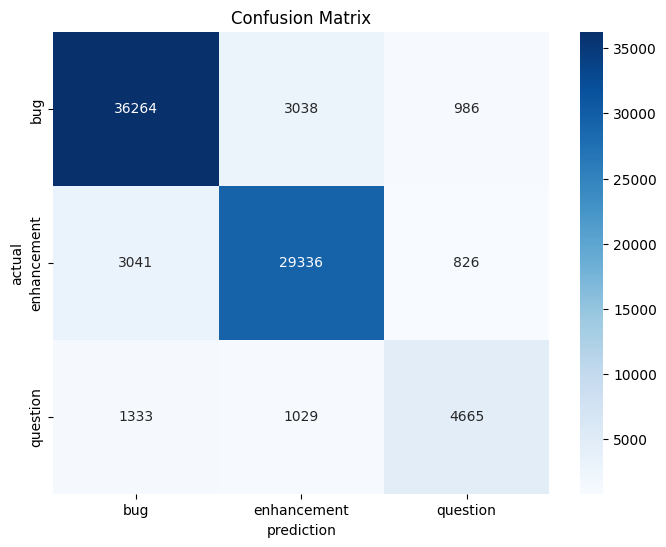

In [11]:
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_df,
            annot = True,
            fmt = 'd',
            cmap = 'Blues')
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('Confusion Matrix')
plt.show()

In [12]:
print(class_report)

              precision    recall  f1-score   support

         bug      0.892     0.900     0.896     40288
 enhancement      0.878     0.884     0.881     33203
    question      0.720     0.664     0.691      7027

    accuracy                          0.873     80518
   macro avg      0.830     0.816     0.823     80518
weighted avg      0.872     0.873     0.872     80518



In [13]:
test['roberta_prediction'] = roberta_preds['prediction']
test.tail()

original_issue_title  \
80513                         No Gap Fill with bucket size bigger then inserted interval of data   
80514                     desktop: Support sandbox with webkit_web_context_set_sandbox_enabled()   
80515                                                                     Can't install watchman   
80516  [Enhancement] Optional top section of Kirby page contents, visually blending with toolbar   
80517                                                   Script manage.sh wont work after install   

                                                                           preprocessed_title  \
80513                      no gap fill with bucket size bigger then inserted interval of data   
80514                     desktop support sandbox with webkit_web_context_set_sandbox_enabled   
80515                                                                  can't install watchman   
80516  enhancement optional top section of kirby page contents visually blending with toolbar   
80517                                                script manage.sh wont work after install   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [14]:
test.head()

,original_issue_title,preprocessed_title,original_issue_body,preprocessed_body,text,issue_label,labels,roberta_prediction
0,"ERROR: KeyError: key (TIFF.SAMPLEFORMAT_INT, 0x0008) not found",error keyerror key tiff.sampleformat_int 0x0008 not found,"One more error might need to be caught.\r\n`4D-series.ome.tif` is sample file from [OME-TIFF website]( https://docs.openmicroscopy.org/ome-model/6.0.0/ome-tiff/data.html).\r\n\r\n```julia\r\njulia> TIFF.load(""4D-series.ome.tif"")\r\nERROR: KeyError: key (TIFF.SAMPLEFORMAT_INT, 0x0008) not found\r\nStacktrace:\r\n [1] getindex(::Dict{Tuple{TIFF.SampleFormats,Int64},DataType}, ::Tuple{TIFF.SampleFormats,UInt16}) at ./dict.jl:477\r\n [2] output(::TIFF.IFD{UInt32}) at /home/hf/.julia/dev/TIFF/src/ifds.jl:113\r\n [3] load(::String) at /home/hf/.julia/dev/TIFF/src/load.jl:14\r\n [4] top-level scope at REPL[2]:1\r\n```\r\n",one more error might need to be caught. 4d series.ome.tif is sample file from ome tiff website https docs.openmicroscopy.org ome model 6.0.0 ome tiff data.html . julia julia tiff.load 4d series.ome.tif error keyerror key tiff.sampleformat_int 0x0008 not found stacktrace 1 getindex dict tuple tiff.sampleformats int64 datatype tuple tiff.sampleformats uint16 at . dict.jl 477 2 output tiff.ifd uint32 at home hf .julia dev tiff src ifds.jl 113 3 load string at home hf .julia dev tiff src load.jl 14 4 top level scope at repl 2 1,time 2020-04-07T09:08:50Z author NONE repo tlnagy/TIFF.jl title error keyerror key tiff.sampleformat_int 0x0008 not found body one more error might need to be caught. 4d series.ome.tif is sample file from ome tiff website https docs.openmicroscopy.org ome model 6.0.0 ome tiff data.html . julia julia tiff.load 4d series.ome.tif error keyerror key tiff.sampleformat_int 0x0008 not found stacktrace 1 getindex dict tuple tiff.sampleformats int64 datatype tuple tiff.sampleformats uint16 at . dict.jl 477 2 output tiff.ifd uint32 at home hf .julia dev tiff src ifds.jl 113 3 load string at home hf .julia dev tiff src load.jl 14 4 top level scope at repl 2 1,enhancement,1,bug
1,Add database backup to dropbox,add database backup to dropbox,NaN,NaN,time 2020-11-27T07:17:21Z author OWNER repo tisboyo/Twitch_Bot title add database backup to dropbox body nan,enhancement,1,enhancement
2,Add a button/method to open the Source or Output folders,add a button method to open the source or output folders,"Could also add a method to open up path to each file in the File list, by right-clicking.\r\nAlso an option to open up the path to the imgdanke.exe.",could also add a method to open up path to each file in the file list by right clicking. also an option to open up the path to the imgdanke.exe.,time 2021-01-02T19:35:34Z author OWNER repo DrWhoCares/imgdanke title add a button method to open the source or output folders body could also add a method to open up path to each file in the file list by right clicking. also an option to open up the path to the imgdanke.exe.,enhancement,1,enhancement
3,Processes are being started twice,processes are being started twice,At some point I refactored a few things and ended up leaving in an additional call to `process.Start()` that should've just been replaced by the `using Process process = Process.Start()` call.,at some point i refactored a few things and ended up leaving in an additional call to function that should've just been replaced by the using process process function call.,time 2021-01-02T20:55:34Z author OWNER repo DrWhoCares/imgdanke title processes are being started twice body at some point i refactored a few things and ended up leaving in an additional call to function that should've just been replaced by the using process process function call.,bug,0,bug
4,Cannot add hp to wall,cannot add hp to wall,NaN,NaN,time 2020-12-29T15:34:35Z author OWNER repo Bean-1/AOT title cannot add hp to wall body nan,bug,0,bug


In [15]:
test.shape

(80518, 8)

### Train Test Split for LLAMA3 Experiments

In [16]:
_, llama3_sample = train_test_split(
    test,
    test_size = 10000,
    stratify = test['issue_label'],
    random_state = 42
)

In [17]:
llama3_sample.head()

original_issue_title  \
4121                         [BUG] Stonecutter recipe generator generates wrong prefix.   
69306  qssh: function key f1 broken in iTerm2 when "Report modifiers using CSI u" is on   
27210                                       Leftover console logs in ScrollableTerminal   
25140         CUDA.jl initialisation fails after suspending Ubuntu 20.04 with CUDA 11.2   
39392                                                                         生成コードの不具合   

                                                                  preprocessed_title  \
4121                        bug stonecutter recipe generator generates wrong prefix.   
69306  qssh function key f1 broken in iterm2 when report modifiers using csi u is on   
27210                                    leftover console logs in scrollableterminal   
25140      cuda.jl initialisation fails after suspending ubuntu 20.04 with cuda 11.2   
39392                                                                            NaN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [18]:
llama3_sample.shape

(10000, 8)

In [19]:
llama3_sample.to_csv('llama3_test_sample.csv')

In [20]:
llama3_sample.to_pickle('llama3_test_sample.pkl')